In [49]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
s1819 = pd.read_csv("player_stats_2018_2019.csv")

In [51]:
s1718 = pd.read_csv("player_stats_2017_2018.csv")

In [52]:
s1819.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,MIP
0,1,?lex Abrines\abrinal01,SG,25,OKC,31,2,19.0,1.8,5.1,...,12.2,0.1,0.6,0.6,0.053,-2.4,-0.9,-3.4,-0.2,0
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,0,12.3,0.4,1.8,...,9.2,-0.1,0.0,-0.1,-0.022,-5.7,-0.3,-5.9,-0.1,0
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,12.6,1.1,3.2,...,13.5,-0.1,0.2,0.1,0.011,-3.1,-1.3,-4.4,-0.3,0
3,4,Steven Adams\adamsst01,C,25,OKC,80,80,33.4,6.0,10.1,...,16.4,5.1,4.0,9.1,0.163,0.6,2.1,2.7,3.2,0
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,28,23.3,3.4,5.9,...,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4,0


In [53]:
x = s1819["MP"] - s1718["MP"]

In [54]:
y = s1819["PTS"] - s1718["PTS"]

In [55]:
rows = s1819.count()

In [56]:
MP_PTS = pd.DataFrame(data=[x,y])

In [57]:
MP_PTS = MP_PTS.transpose()

In [58]:
MP_PTS = MP_PTS.dropna()

In [59]:
MP_PTS

,MP,PTS
0,3.9,0.6
1,-7.1,-4.2
2,-20.1,-10.7
3,13.6,7.0
4,10.4,5.5
5,7.9,1.1
6,-30.4,-22.1
7,13.2,13.1
8,6.1,2.6
9,-1.5,0.9


In [60]:
from sklearn.cluster import KMeans

In [61]:
kmeans = KMeans(n_clusters=15)

In [62]:
kmeans.fit(MP_PTS)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
kmeans.cluster_centers_

array([[ 13.87575758,   5.71818182],
       [-14.55882353,  -6.07352941],
       [ -2.54666667,  -0.105     ],
       [ 20.22857143,  21.47142857],
       [  2.75454545,   1.975     ],
       [ 15.73076923,  12.80769231],
       [ -7.33571429,  -3.05428571],
       [-10.88947368, -10.45789474],
       [-26.95      , -20.36      ],
       [ 23.78666667,  10.2       ],
       [  8.14615385,   3.22564103],
       [-22.48684211, -11.32631579],
       [ 28.04285714,  20.73571429],
       [  4.34285714,   9.72142857],
       [  1.51904762,  -2.97619048]])

In [64]:
kmeans.labels_

array([ 4,  6, 11,  0, 10, 10,  8,  5, 10,  2,  2, 10,  4,  1,  9,  8, 13,
        1,  5,  1,  0, 10, 10,  4,  5,  6,  2,  6,  1,  6,  1, 10,  4,  7,
        7, 12, 14,  2, 10,  1, 10,  1, 14,  0, 10,  6,  4, 10, 13,  4,  7,
        5, 12,  8,  0,  4, 13,  2,  1, 14,  0, 10, 11,  5,  0,  2,  0,  9,
       11,  6,  2,  7, 10,  6,  6,  7,  6,  5, 10,  2,  4,  2, 10,  6,  4,
       11,  1,  1,  2,  7,  4,  5, 13,  0,  6,  6,  5,  0,  4,  5,  7,  1,
        6,  0,  6, 10,  4,  6,  2,  2,  2, 11,  0,  1,  2,  3,  8,  4,  6,
        1,  0,  4,  3,  9, 11,  6,  5,  7,  7, 12, 11,  8,  3,  6, 14,  7,
        2, 10,  1,  6, 10,  4,  2, 10,  0,  2, 11,  2,  6,  7,  5,  7,  6,
        4,  4,  5, 14,  6,  0, 11, 14, 14,  6,  2, 14, 10,  2, 11,  2, 14,
        6,  4, 12, 11,  8,  3, 14,  6,  6, 13, 10,  4,  4,  4,  4,  9,  2,
        6,  4,  2,  2, 13,  6,  2,  0, 11, 13,  6,  6,  4,  9,  6, 10,  6,
        2,  5,  0,  4,  2,  1,  2,  8, 14,  5, 10,  6, 11,  6, 13, 14,  7,
        3,  2,  4,  6,  2

In [65]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,20

Text(0.5, 1.0, 'K-Means Classification')

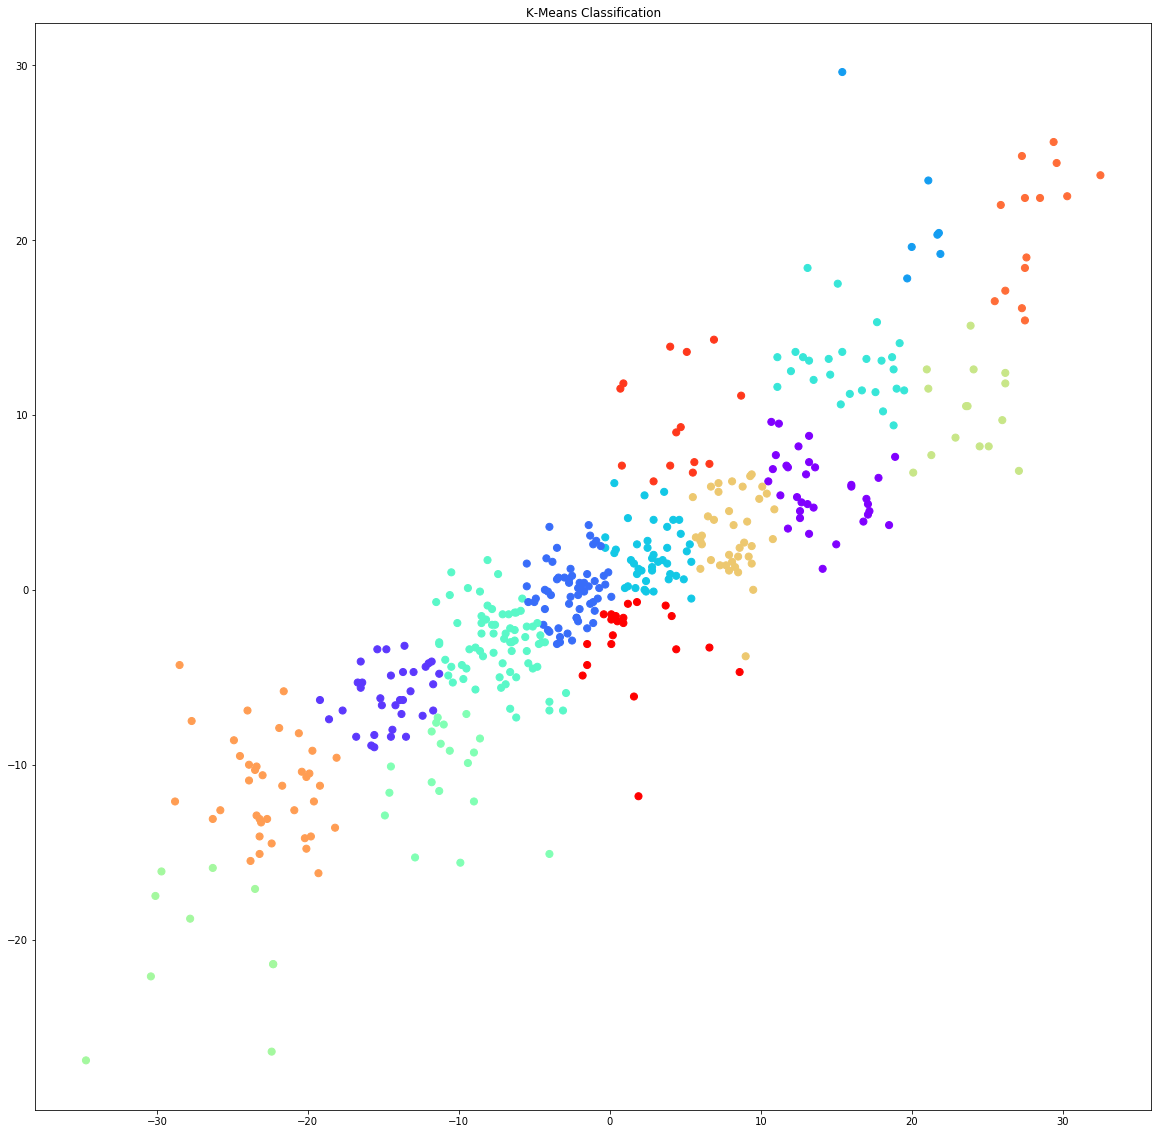

In [66]:
plt.plot(1,2,2)
plt.scatter(x=MP_PTS.MP,y=MP_PTS.PTS,c=kmeans.labels_,cmap='rainbow', s=50)
plt.title('K-Means Classification')

In [67]:
TS_Pts_RA = pd.DataFrame(data=[s1819["TS%"],s1819["PTS"],s1819["TRB"]+s1819["AST"]], index=['TS','PTS',"RA"])

In [68]:
TS_Pts_RA = TS_Pts_RA.transpose()

In [69]:
TS_Pts_RA = TS_Pts_RA.dropna()

In [70]:
from sklearn.cluster import KMeans

In [71]:
kmeans = KMeans(n_clusters=5)

In [72]:
kmeans.fit(TS_Pts_RA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [73]:
kmeans.cluster_centers_

array([[ 0.54700719,  6.42589928,  4.70431655],
       [ 0.56957895, 16.93684211,  9.31403509],
       [ 0.58060714, 24.57857143, 13.23214286],
       [ 0.55935556, 10.96555556,  7.56222222],
       [ 0.48038889,  2.76031746,  2.00634921]])

In [74]:
kmeans.labels_

array([4, 4, 4, 1, 3, 4, 4, 2, 4, 4, 3, 3, 3, 4, 3, 4, 2, 4, 3, 0, 0, 3,
       1, 0, 1, 4, 3, 0, 3, 3, 0, 3, 0, 0, 3, 2, 3, 0, 3, 4, 3, 0, 4, 0,
       3, 0, 0, 3, 0, 1, 0, 3, 1, 0, 0, 4, 2, 4, 0, 0, 0, 4, 4, 1, 0, 0,
       4, 3, 4, 0, 0, 3, 3, 4, 0, 4, 3, 1, 3, 4, 0, 3, 3, 0, 3, 4, 4, 4,
       4, 4, 0, 1, 1, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0, 3, 4, 0, 2, 0, 2, 0,
       0, 4, 3, 4, 0, 2, 4, 0, 4, 0, 1, 0, 2, 3, 4, 3, 1, 0, 3, 2, 4, 4,
       2, 4, 4, 3, 0, 3, 0, 4, 0, 0, 0, 3, 1, 1, 4, 4, 4, 0, 1, 0, 0, 1,
       2, 3, 0, 3, 1, 4, 1, 1, 0, 0, 0, 3, 0, 4, 3, 3, 0, 3, 2, 4, 4, 2,
       0, 1, 0, 3, 3, 0, 0, 4, 4, 3, 0, 0, 0, 0, 4, 1, 4, 4, 0, 0, 2, 3,
       0, 1, 0, 3, 3, 4, 1, 0, 1, 0, 0, 3, 4, 1, 2, 3, 0, 4, 0, 3, 3, 1,
       2, 4, 0, 4, 4, 0, 2, 0, 0, 4, 0, 4, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0,
       0, 1, 1, 2, 0, 4, 4, 1, 3, 2, 0, 4, 3, 2, 4, 4, 0, 3, 3, 1, 1, 4,
       4, 4, 0, 4, 4, 4, 0, 1, 4, 0, 4, 4, 4, 1, 0, 0, 3, 0, 0, 4, 0, 0,
       0, 0, 4, 1, 0, 4, 3, 3, 4, 2, 4, 0, 3, 4, 3,

In [75]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,20

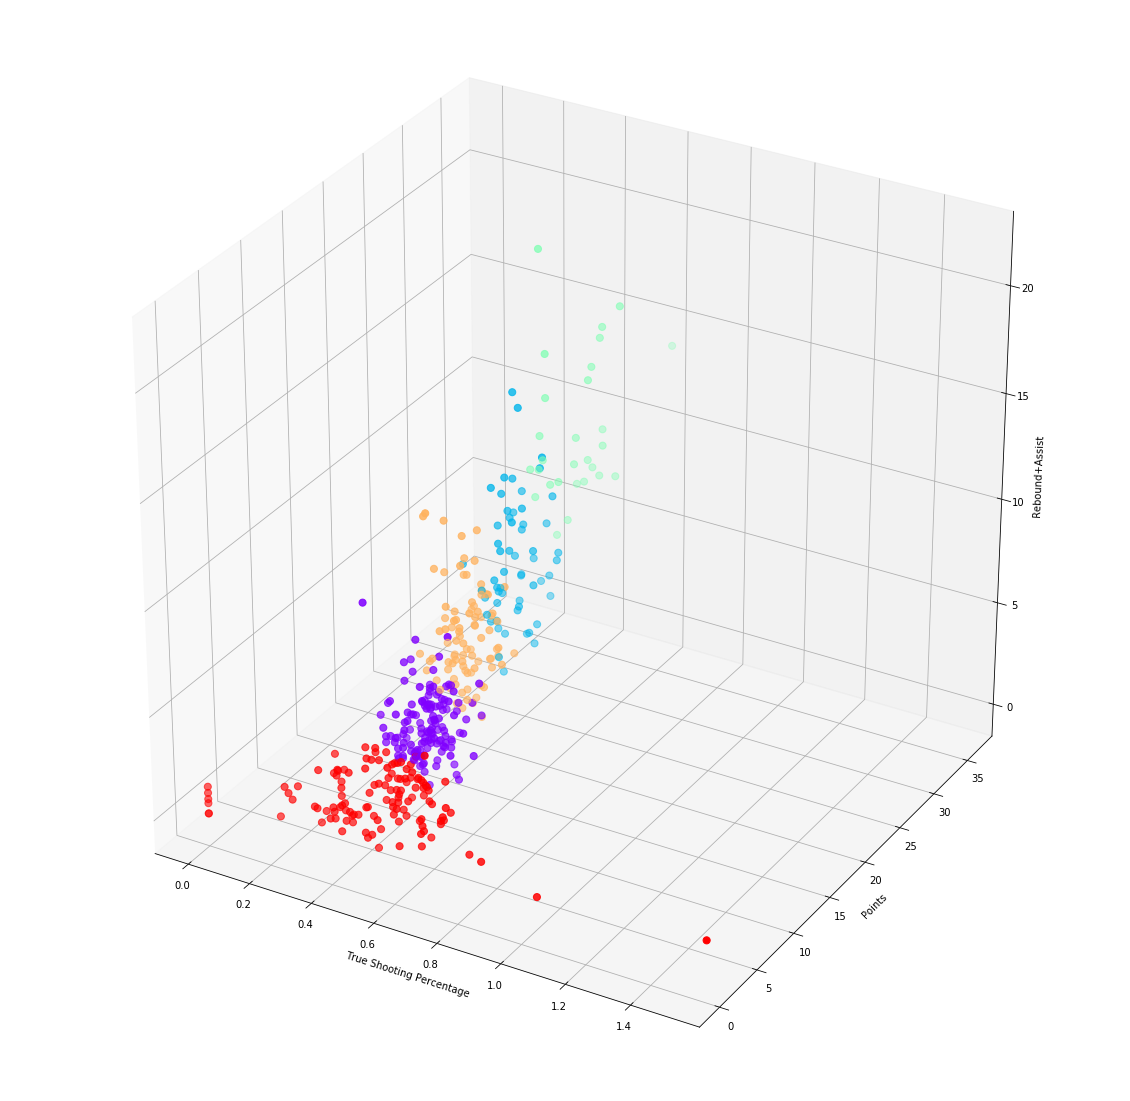

In [76]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = TS_Pts_RA.TS
y = TS_Pts_RA.PTS
z = TS_Pts_RA.RA



ax.scatter(x, y, z, c=kmeans.labels_, cmap='rainbow', s=50, marker='o')

ax.set_xlabel('True Shooting Percentage')
ax.set_ylabel('Points')
ax.set_zlabel('Rebound+Assist')

plt.show()

In [125]:
import plotly.express as px
fig = px.scatter_3d(TS_Pts_RA, x='TS', y='PTS', z='RA',
              color=kmeans.labels_, width=1000, height=1000, color_continuous_scale='Portland')
fig.update_traces(marker=dict(size=5))

fig.show()